In [1]:
import numpy as np
import pandas as pd

## COMBINING AND MERGING DATASETS

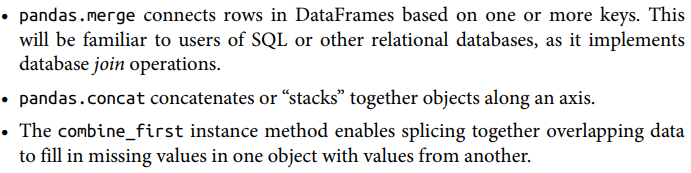

In [3]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1, df2

(  key  data1
 0   b      0
 1   b      1
 2   a      2
 3   c      3
 4   a      4
 5   a      5
 6   b      6,
   key  data2
 0   a      0
 1   b      1
 2   d      2)

In [4]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [5]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [7]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [8]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


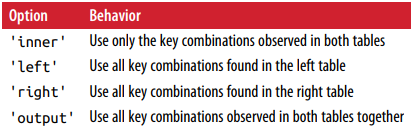

In [9]:
# M-to-M:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1, df2

(  key  data1
 0   b      0
 1   b      1
 2   a      2
 3   c      3
 4   a      4
 5   b      5,
   key  data2
 0   a      0
 1   b      1
 2   a      2
 3   b      3
 4   d      4)

In [10]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [11]:
pd.merge(df1, df2, on='key', how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [12]:
# Multiple keys
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                    'key2': ['one', 'two', 'one'],
                    'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [13]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [14]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


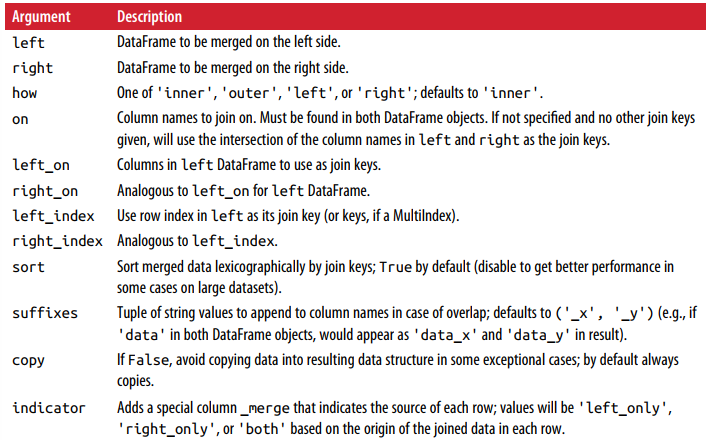

### MERGING ON INDEX

In [15]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1, right1

(  key  value
 0   a      0
 1   b      1
 2   a      2
 3   a      3
 4   b      4
 5   c      5,
    group_val
 a        3.5
 b        7.0)

In [16]:
pd.merge(left1, right1, left_on='key', right_index=True)
# right_index used as merge key

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [17]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [18]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth, righth

(     key1  key2  data
 0    Ohio  2000   0.0
 1    Ohio  2001   1.0
 2    Ohio  2002   2.0
 3  Nevada  2001   3.0
 4  Nevada  2002   4.0,
              event1  event2
 Nevada 2001       0       1
        2000       2       3
 Ohio   2000       4       5
        2000       6       7
        2001       8       9
        2002      10      11)

In [19]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [20]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True,
        how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [21]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2, right2

(   Ohio  Nevada
 a   1.0     2.0
 c   3.0     4.0
 e   5.0     6.0,
    Missouri  Alabama
 b       7.0      8.0
 c       9.0     10.0
 d      11.0     12.0
 e      13.0     14.0)

In [22]:
pd.merge(left2, right2, left_index=True, right_index=True, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [23]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [24]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [25]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [26]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### CONCATENATING ALONG AN AXIS

In [27]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [31]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [32]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [33]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [34]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [35]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [44]:
res = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
res

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [45]:
res.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [46]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [47]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1, df2

(   one  two
 a    0    1
 b    2    3
 c    4    5,
    three  four
 a      5     6
 c      7     8)

In [48]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [49]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [50]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1, df2

(          a         b         c         d
 0 -0.544986 -1.268388  0.235826  1.181561
 1  0.011445  0.458980 -0.879871 -1.106985
 2  2.031802 -0.300690  0.921243  0.161294,
           b         d         a
 0 -0.549239  0.691472  0.107444
 1 -1.063541  1.412301  0.067732)

In [51]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.544986,-1.268388,0.235826,1.181561
1,0.011445,0.458980,-0.879871,-1.106985
2,2.031802,-0.300690,0.921243,0.161294
3,0.107444,-0.549239,NaN,0.691472
4,0.067732,-1.063541,NaN,1.412301


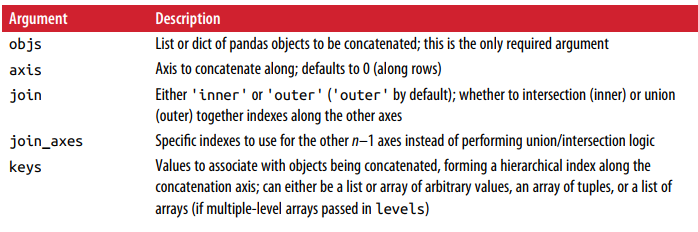
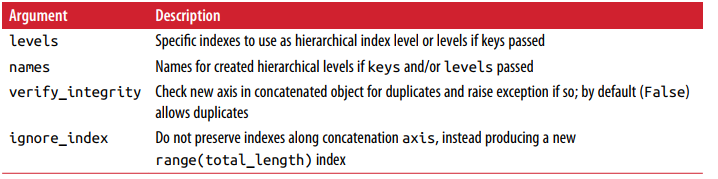

### COMBINING DATA WITH OVERLAP

In [53]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a, b

(f    NaN
 e    2.5
 d    NaN
 c    3.5
 b    4.5
 a    NaN
 dtype: float64,
 f    0.0
 e    1.0
 d    2.0
 c    3.0
 b    4.0
 a    NaN
 dtype: float64)

In [54]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [55]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [56]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1, df2

(     a    b   c
 0  1.0  NaN   2
 1  NaN  2.0   6
 2  5.0  NaN  10
 3  NaN  6.0  14,
      a    b
 0  5.0  NaN
 1  4.0  3.0
 2  NaN  4.0
 3  3.0  6.0
 4  7.0  8.0)

In [57]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


### DISCRETIZATION AND BINNING
pd.cut()
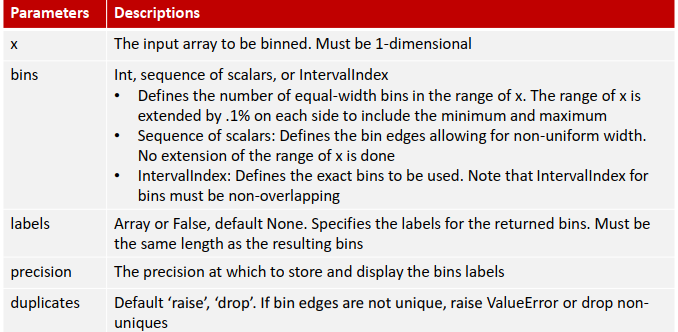

pd.qcut()
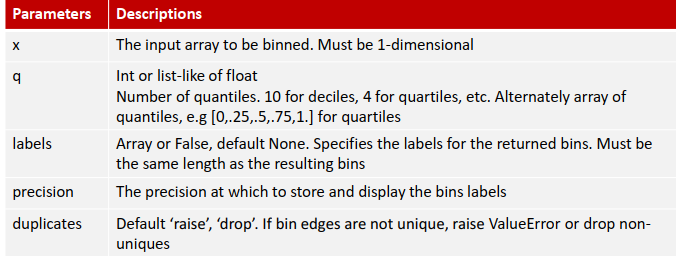

## PROJECT

In [5]:
df = pd.read_csv('OnlineRetail.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203422 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    203422 non-null  object 
 1   StockCode    203422 non-null  object 
 2   Description  202623 non-null  object 
 3   Quantity     203422 non-null  int64  
 4   InvoiceDate  203422 non-null  object 
 5   UnitPrice    203422 non-null  float64
 6   CustomerID   150039 non-null  float64
 7   Country      203422 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.4+ MB


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [7]:
df['InvoiceDate'].min(), df['InvoiceDate'].max() 

('2011-01-04 10:00:00', '2011-06-30 20:08:00')

In [10]:
df.duplicated().sum()

1512

In [14]:
df = df.drop_duplicates()

In [16]:
df.shape

(201910, 8)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [18]:
df[['InvoiceNo', 'StockCode']].duplicated().sum()

1441

In [20]:
df[df[['InvoiceNo', 'StockCode']].duplicated() == True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
70,540005,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,6,2011-01-04 10:38:00,1.65,17315.0,United Kingdom
1015,540093,79321,CHILLI LIGHTS,3,2011-01-04 15:24:00,4.95,16725.0,United Kingdom
1017,540093,22072,RED RETROSPOT TEA CUP AND SAUCER,1,2011-01-04 15:24:00,3.75,16725.0,United Kingdom
1294,540126,21110,LARGE CAKE TOWEL PINK SPOTS,96,2011-01-05 10:45:00,1.95,13798.0,United Kingdom
1295,540126,21109,LARGE CAKE TOWEL CHOCOLATE SPOTS,96,2011-01-05 10:45:00,1.95,13798.0,United Kingdom


In [22]:
df[(df['InvoiceNo'] == '540005') & (df['StockCode'] == '85062')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
64,540005,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,12,2011-01-04 10:38:00,1.65,17315.0,United Kingdom
70,540005,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,6,2011-01-04 10:38:00,1.65,17315.0,United Kingdom


the Quantity is different

In [24]:
df[['InvoiceNo', 'StockCode', 'Quantity']].duplicated().sum()

73

In [26]:
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'Quantity'])
df[['InvoiceNo', 'StockCode', 'Quantity']].duplicated().sum()

0

In [27]:
df.shape

(201837, 8)

In [28]:
df['Quantity'].describe()

count    201837.000000
mean          9.639784
std         241.862168
min      -74215.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       74215.000000
Name: Quantity, dtype: float64

Min < 0 ??
--> check how many are < 0

In [31]:
df[df['Quantity'] <= 0].shape

(4395, 8)

In [34]:
df[df['Quantity']<=0]['InvoiceNo'].str.startswith('C').sum()

3707

In [35]:
df.isnull().sum() / df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.003959
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.264099
Country        0.000000
dtype: float64

In [37]:
df = df[df['CustomerID'].notnull()]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['Quantity'] > 0]
df.shape

<ipython-input-37-b2af4aac3e64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


(145000, 8)

In [39]:
customer_df = pd.DataFrame()
customer_df['CustomerID'] = df['CustomerID'].unique()

In [40]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [42]:
frequency_df = df.groupby('CustomerID').InvoiceNo.nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
customer_df = pd.merge(customer_df, frequency_df, on='CustomerID', how='left')
customer_df.head()

,CustomerID,Frequency
0,13313.0,2
1,18097.0,2
2,16656.0,5
3,16875.0,3
4,13094.0,7


In [43]:
monetary_df = df.groupby('CustomerID').TotalRevenue.sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']
customer_df = pd.merge(customer_df, monetary_df, on='CustomerID', how='left')
customer_df.head()

,CustomerID,Frequency,Monetary
0,13313.0,2,609.74
1,18097.0,2,1274.04
2,16656.0,5,3128.72
3,16875.0,3,805.09
4,13094.0,7,869.40


In [44]:
recency_df = (df.InvoiceDate.max() - df.groupby('CustomerID').InvoiceDate.max())\
                .dt.days.reset_index()
recency_df.columns = ['CustomerID', 'Recency']
customer_df = pd.merge(customer_df, recency_df, on='CustomerID', how='left')
customer_df.head()

,CustomerID,Frequency,Monetary,Recency
0,13313.0,2,609.74,53
1,18097.0,2,1274.04,43
2,16656.0,5,3128.72,30
3,16875.0,3,805.09,134
4,13094.0,7,869.40,29


In [45]:
customer_df.describe()

,CustomerID,Frequency,Monetary,Recency
count,2724.000000,2724.000000,2724.000000,2724.000000
mean,15283.547724,2.717695,1251.721623,59.764684
std,1717.888344,3.878238,4577.361618,47.913115
min,12346.000000,1.000000,2.900000,0.000000
25%,13799.750000,1.000000,244.417500,20.000000
50%,15237.500000,2.000000,492.360000,46.000000
75%,16766.250000,3.000000,1067.407500,94.000000
max,18287.000000,67.000000,127410.230000,177.000000


In [47]:
customer_df['f_quantile'] = pd.qcut(customer_df['Frequency'], 4, [1, 2, 3], duplicates='drop')

In [48]:
customer_df['r_quantile'] = pd.qcut(customer_df['Recency'], 4, [4, 3, 2, 1])
customer_df['m_quantile'] = pd.qcut(customer_df['Monetary'], 4, [1, 2, 3, 4])

In [49]:
customer_df.head()

,CustomerID,Frequency,Monetary,Recency,f_quantile,r_quantile,m_quantile
0,13313.0,2,609.74,53,1,2,3
1,18097.0,2,1274.04,43,1,3,4
2,16656.0,5,3128.72,30,3,3,4
3,16875.0,3,805.09,134,2,1,3
4,13094.0,7,869.40,29,3,3,3


In [50]:
customer_df['RFM_score'] = customer_df[['f_quantile', 'r_quantile', 'm_quantile']].sum(axis=1)

In [51]:
customer_df.head()

,CustomerID,Frequency,Monetary,Recency,f_quantile,r_quantile,m_quantile,RFM_score
0,13313.0,2,609.74,53,1,2,3,6
1,18097.0,2,1274.04,43,1,3,4,8
2,16656.0,5,3128.72,30,3,3,4,10
3,16875.0,3,805.09,134,2,1,3,6
4,13094.0,7,869.40,29,3,3,3,9


In [55]:
customer_df['RFM_score'].describe(percentiles=np.arange(0,1,0.02))

count    2724.000000
mean        6.514684
std         2.461784
min         3.000000
0%          3.000000
2%          3.000000
4%          3.000000
6%          3.000000
8%          3.000000
10%         3.000000
12%         4.000000
14%         4.000000
16%         4.000000
18%         4.000000
20%         4.000000
22%         4.000000
24%         4.000000
26%         5.000000
28%         5.000000
30%         5.000000
32%         5.000000
34%         5.000000
36%         5.000000
38%         5.000000
40%         5.000000
42%         6.000000
44%         6.000000
46%         6.000000
48%         6.000000
50%         6.000000
52%         6.000000
54%         6.000000
56%         7.000000
58.0%       7.000000
60%         7.000000
62%         7.000000
64%         7.000000
66%         7.000000
68%         8.000000
70%         8.000000
72%         8.000000
74%         8.000000
76%         9.000000
78%         9.000000
80%         9.000000
82%         9.000000
84%        10.000000
86%        10

In [57]:
customer_df['Segment'] = pd.cut(customer_df['RFM_score'], bins=[2, 5, 10, 11],\
                               labels=['low', 'mid', 'high'])

In [58]:
customer_df['Segment'].value_counts(normalize=True)

mid     0.504405
low     0.402349
high    0.093245
Name: Segment, dtype: float64